<a href="https://colab.research.google.com/github/sbanty/QuarkMatter/blob/main/Copy_of_All.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-2-94795a6e15dd>:6: RuntimeWarning: overflow encountered in exp
  y = (x ** 2 * np.sqrt(x ** 2 + mass ** 2)) / (np.exp((np.sqrt(x ** 2 + mass ** 2) - mu) / tmp) + 1)


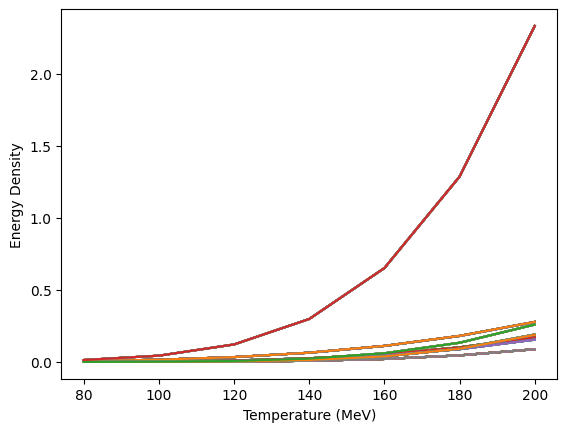

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def energy_density(x, g, mass, mu, tmp):
    y = (x ** 2 * np.sqrt(x ** 2 + mass ** 2)) / (np.exp((np.sqrt(x ** 2 + mass ** 2) - mu) / tmp) + 1)
    energy_density = (g / (2.0 * np.pi ** 2)) * y
    return energy_density

# Particle properties
mass_values_mev = [139.6, 135, 493.7, 497.6, 547.862, 775.26, 775.26, 775.26, 891.76, 896.10, 896.10, 896.10, 782.65]
particle_names = ['pi+', 'pi-', 'pi0', 'K+', 'K0', 'K-', 'Kbar0', 'eta', 'rho+', 'rho-', 'rho0', 'K*+', 'K*0', 'K*-','Kbar*0', 'w0']
g_values = [1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3]
mu_value_mev = 0

# Constants
#conversion_factor = 1.25e-7  # Conversion factor from MeV^3 to fm^(-3)

# Temperature values in MeV
tmp_values_mev = [80, 100, 120, 140, 160, 180, 200]

# Results storage
results_energy_density = []

# Calculate properties for each particle
for g, mass in zip(g_values, mass_values_mev):
    mass_energy_density_results = []
    for tmp in tmp_values_mev:
        result_energy_density = quad(energy_density, 0, np.inf, args=(g, mass, mu_value_mev, tmp))[0] * (1/(200)**4)
        mass_energy_density_results.append(result_energy_density)
    results_energy_density.append(mass_energy_density_results)

totalenergy = []
for values in zip(*results_energy_density):
    total_energy = sum(values)
    totalenergy.append(total_energy)




# Plotting energy density
plt.figure()
for i, name in enumerate(particle_names):
    plt.plot(tmp_values_mev,results_energy_density[0],label=r'$\pi^+-$')
    plt.plot(tmp_values_mev,results_energy_density[1],label=r'$\pi^0$')
    plt.plot(tmp_values_mev,results_energy_density[2],label=r'$K^+-$')
    plt.plot(tmp_values_mev,results_energy_density[3],label=r'$k^0$')
    plt.plot(tmp_values_mev,results_energy_density[4],label=r'$\eta^0$')
    plt.plot(tmp_values_mev,results_energy_density[5],label=r'$\rho^+$')
    plt.plot(tmp_values_mev,results_energy_density[6],label=r'$\rho^-$')
    plt.plot(tmp_values_mev,results_energy_density[7],label=r'$\rho^0$')
    plt.plot(tmp_values_mev,results_energy_density[8],label=r'$k^*+$')
    plt.plot(tmp_values_mev,results_energy_density[9],label=r'$k^*0$')
    plt.plot(tmp_values_mev,results_energy_density[10],label=r'$k^*-$')
    plt.plot(tmp_values_mev,results_energy_density[11],label=r'$\k{bar}^*0$')
    plt.plot(tmp_values_mev,results_energy_density[12],label=r'$w^0$')
    plt.plot(tmp_values_mev,totalenergy,label=r'total_energy')
plt.xlabel("Temperature (MeV)")
plt.ylabel("Energy Density")
#plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def particle_density(x, g, mass, mu, tmp):
    y = x ** 2 / (np.exp((np.sqrt(x ** 2 + mass** 2) - mu) / tmp) - 1)
    particle_density = (g / (2.0 * np.pi ** 2)) * y
    return particle_density

def partial_pressure(x, g, mass, mu, tmp):
    y = x ** 2 * np.log(1 + np.exp(-(np.sqrt(x ** 2 + mass ** 2) - mu) / tmp))
    partial_pressure = ((g * tmp) / (2 * np.pi ** 2)) * y
    return  partial_pressure

def energy_density(x, g, mass, mu, tmp):
    y = (x ** 2 * np.sqrt(x ** 2 + mass ** 2)) / (np.exp((np.sqrt(x ** 2 + mass ** 2) - mu) / tmp) + 1)
    energy_density = (g / (2.0 * np.pi ** 2)) * y
    return energy_density

def entropy_density(x, g, mass, mu, tmp):
    z = (np.sqrt(x ** 2 + mass ** 2) - mu) / (tmp * (np.exp((np.sqrt(x ** 2 + mass  ** 2) - mu) / tmp) + 1))
    y = x ** 2 * (np.log((1 + np.exp(-(np.sqrt(x ** 2 + mass ** 2) - mu) / tmp))) + z)
    entropy_density = ((g / (2 * np.pi ** 2))) * y
    return entropy_density

# Temperature values in MeV
tmp_values_mev = [80, 100, 120, 140, 160, 180, 200]

# Particle properties
mass_values_mev = [139.6, 135, 493.7, 497.6, 547.862, 775.26, 775.26, 775.26, 891.76, 896.10, 896.10, 896.10, 782.65]
particle_names = ['pi+', 'pi-', 'pi0', 'K+', 'K0', 'K-', 'Kbar0', 'eta', 'rho+', 'rho-', 'rho0', 'K*+', 'K*0', 'K*-','Kbar*0', 'w0']
g_values = [1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3]
mu_value_mev = 0


# Results storage
results_particle_density = []
results_partial_pressure = []
results_energy_density = []
results_entropy_density = []

# conversion_factor = (1.25e-7)  # Conversion factor from MeV^3 to fm^(-3)

# Calculate properties for each particle
for g, mass in zip(g_values, mass_values_mev):
    mass_particle_density_results = []
    mass_partial_pressure_results = []
    mass_energy_density_results = []
    mass_entropy_density_results = []
    for tmp in tmp_values_mev:
        result_particle_density = quad(particle_density, 0, np.inf, args=(g, mass, mu_value_mev, tmp))[0] * (1/(200)**3)

        result_partial_pressure = quad(partial_pressure, 0, np.inf, args=(g, mass, mu_value_mev, tmp))[0] * (1/(200)**4)
        result_energy_density = quad(energy_density, 0, np.inf, args=(g, mass, mu_value_mev, tmp))[0] * (1/(200)**4)

        result_entropy_density = quad(entropy_density, 0, np.inf, args=(g, mass, mu_value_mev, tmp))[0] * (1/(200)**3)
        mass_particle_density_results.append(result_particle_density)
        mass_partial_pressure_results.append(result_partial_pressure)
        mass_energy_density_results.append(result_energy_density)
        mass_entropy_density_results.append(result_entropy_density)

    results_particle_density.append(mass_particle_density_results)
    results_partial_pressure.append(mass_partial_pressure_results)
    results_energy_density.append(mass_energy_density_results)
    results_entropy_density.append(mass_entropy_density_results)



print("Particle density results (fm^(-3)):")
print(results_particle_density[0])
print("\nPartial pressure results (fm^(-4)):")
print(results_partial_pressure[0])
print("\nEnergy density results (fm^(-4)):")
print(results_energy_density[0])
print("\nEntropy density results (fm^(-3)):")
print(results_entropy_density[0])

totalparticledensity=[]
for x, y,z,l,m,n,o,p,u,v,s,t,r in zip(results_particle_density[0], results_particle_density[1],results_particle_density[2],results_particle_density[3],results_particle_density[4], results_particle_density[5], results_particle_density[6],results_particle_density[7],results_particle_density[8],results_particle_density[9],results_particle_density[10], results_particle_density[11],results_particle_density[12]):
    totalparticledensity.append(x + y+l+m+z+n+o+p+u+v+s+t+r)

totalpressure=[]
for x, y,z,l,m,n,o,p,u,v,s,t,r in zip(results_partial_pressure[0], results_partial_pressure[1],results_partial_pressure[2],results_partial_pressure[3],results_partial_pressure[4],results_partial_pressure[5],results_partial_pressure[6],results_partial_pressure[7],results_partial_pressure[8], results_partial_pressure[9],results_partial_pressure[10], results_partial_pressure[11],results_partial_pressure[12]):
    totalpressure.append(x + y+l+m+z+n+o+p+u+v+s+t+r)

totalenergy=[]
for x, y,z,l,m,n,o,p,u,v,s,t,r in zip(results_energy_density[0], results_energy_density[1],results_energy_density[2],results_energy_density[3],results_energy_density[4],results_energy_density[5],results_energy_density[6],results_energy_density[7],results_energy_density[8], results_energy_density[9],results_energy_density[10], results_energy_density[11],results_energy_density[12]):
    totalenergy.append(x + y+l+m+z+n+o+p+u+v+s+t+r)

totalentropy=[]
for x, y,z,l,m,n,o,p,u,v,s,t,r in zip(results_entropy_density[0], results_entropy_density[1],results_entropy_density[2],results_entropy_density[3],results_entropy_density[4],results_entropy_density[5],results_entropy_density[6],results_entropy_density[7],results_entropy_density[8], results_entropy_density[9], results_entropy_density[10], results_entropy_density[11],results_entropy_density[12]):
    totalentropy.append(x + y+l+m+z+n+o+p+u+v+s+t+r)

# Plotting particle density
# plt.figure()
# for i, name in enumerate(particle_names):
    plt.figure()
    plt.plot(tmp_values_mev, results_energy_density[0], label=r'$\pi^+-$')
    plt.plot(tmp_values_mev,results_particle_density[1],label=r'$\pi^0$')
    plt.plot(tmp_values_mev,results_particle_density[2],label=r'$K^+-$')
    plt.plot(tmp_values_mev,results_particle_density[3],label=r'$k^0$')
    plt.plot(tmp_values_mev,results_particle_density[4],label=r'$\eta^0$')
    plt.plot(tmp_values_mev,results_particle_density[5],label=r'$\rho^+$')
    plt.plot(tmp_values_mev,results_particle_density[6],label=r'$\rho^-$')
    plt.plot(tmp_values_mev,results_particle_density[7],label=r'$\rho^0$')
    plt.plot(tmp_values_mev,results_particle_density[8],label=r'$k^*+$')
    plt.plot(tmp_values_mev,results_particle_density[9],label=r'$k^*0$')
    plt.plot(tmp_values_mev,results_particle_density[10],label=r'$k^*-$')
    plt.plot(tmp_values_mev,results_particle_density[11],label=r'$\k{bar}^*0$')
    plt.plot(tmp_values_mev,results_particle_density[12],label=r'$w^0$')
    plt.plot(tmp_values_mev,totalparticledensity,label=r'Total particle density')
    plt.xlabel("Temperature (MeV)")
    plt.ylabel("particle density")
    plt.legend()
    plt.show()

# Plotting partial pressure
# plt.figure()
# for i, name in enumerate(particle_names):
    plt.figure()
    plt.plot(tmp_values_mev, results_energy_density[0], label=r'$\pi^+-$')
    plt.plot(tmp_values_mev,results_partial_pressure[1],label=r'$\pi^0$')
    plt.plot(tmp_values_mev,results_partial_pressure[2],label=r'$K^+-$')
    plt.plot(tmp_values_mev,results_partial_pressure[3],label=r'$k^0$')
    plt.plot(tmp_values_mev,results_partial_pressure[4],label=r'$\eta^0$')
    plt.plot(tmp_values_mev,results_partial_pressure[5],label=r'$\rho^+$')
    plt.plot(tmp_values_mev,results_partial_pressure[6],label=r'$\rho^-$')
    plt.plot(tmp_values_mev,results_partial_pressure[7],label=r'$\rho^0$')
    plt.plot(tmp_values_mev,results_partial_pressure[8],label=r'$k^*+$')
    plt.plot(tmp_values_mev,results_partial_pressure[9],label=r'$k^*0$')
    plt.plot(tmp_values_mev,results_partial_pressure[10],label=r'$k^*-$')
    plt.plot(tmp_values_mev,results_partial_pressure[11],label=r'$\k{bar}^*0$')
    plt.plot(tmp_values_mev,results_partial_pressure[12],label=r'$w^0$')
    plt.plot(tmp_values_mev,totalpressure,label=r'Total pressure')
    plt.xlabel("Temperature (MeV)")
    plt.ylabel("pressure")
    plt.legend()
    plt.show()


# Plotting energy density
# plt.figure()
# for i, name in enumerate(particle_names):
    plt.figure()
    plt.plot(tmp_values_mev, results_energy_density[0], label=r'$\pi^+-$')
    plt.plot(tmp_values_mev,results_energy_density[1],label=r'$\pi^0$')
    plt.plot(tmp_values_mev,results_energy_density[2],label=r'$K^+-$')
    plt.plot(tmp_values_mev,results_energy_density[3],label=r'$k^0$')
    plt.plot(tmp_values_mev,results_energy_density[4],label=r'$\eta^0$')
    plt.plot(tmp_values_mev,results_energy_density[5],label=r'$\rho^+$')
    plt.plot(tmp_values_mev,results_energy_density[6],label=r'$\rho^-$')
    plt.plot(tmp_values_mev,results_energy_density[7],label=r'$\rho^0$')
    plt.plot(tmp_values_mev,results_energy_density[8],label=r'$k^*+$')
    plt.plot(tmp_values_mev,results_energy_density[9],label=r'$k^*0$')
    plt.plot(tmp_values_mev,results_energy_density[10],label=r'$k^*-$')
    plt.plot(tmp_values_mev,results_energy_density[11],label=r'$\k{bar}^*0$')
    plt.plot(tmp_values_mev,results_energy_density[12],label=r'$w^0$')
    plt.plot(tmp_values_mev,totalenergy,label=r'total energy')
    plt.xlabel("Temperature (MeV)")
    plt.ylabel("Energy Density")
    plt.legend()
    plt.show()


# Plotting entropy density
plt.figure()
plt.plot(tmp_values_mev, results_entropy_density[0], label=r'$\pi^+-$')
plt.plot(tmp_values_mev, results_entropy_density[1], label=r'$\pi^0$')
plt.plot(tmp_values_mev, results_entropy_density[2], label=r'$K^+-$')
plt.plot(tmp_values_mev, results_entropy_density[3], label=r'$k^0$')
plt.plot(tmp_values_mev, results_entropy_density[4], label=r'$\eta^0$')
plt.plot(tmp_values_mev, results_entropy_density[5], label=r'$\rho^+$')
plt.plot(tmp_values_mev, results_entropy_density[6], label=r'$\rho^-$')
plt.plot(tmp_values_mev, results_entropy_density[7], label=r'$\rho^0$')
plt.plot(tmp_values_mev, results_entropy_density[8], label=r'$k^*+$')
plt.plot(tmp_values_mev, results_entropy_density[9], label=r'$k^*0$')
plt.plot(tmp_values_mev, results_entropy_density[10], label=r'$k^*-$')
plt.plot(tmp_values_mev, results_entropy_density[11], label=r'$\bar{k}^*0$')
plt.plot(tmp_values_mev, results_entropy_density[12], label=r'$w^0$')
plt.plot(tmp_values_mev, totalentropy, label='Total Entropy')
plt.xlabel("Temperature (MeV)")
plt.ylabel("Entropy Density")
plt.legend()
plt.show()


all mesons

<ipython-input-9-4d0384f9687f>:6: RuntimeWarning: overflow encountered in exp
  y = x ** 2 / (np.exp((np.sqrt(x ** 2 + mass** 2) - mu) / tmp) - 1)
<ipython-input-9-4d0384f9687f>:16: RuntimeWarning: overflow encountered in exp
  y = (x ** 2 * np.sqrt(x ** 2 + mass ** 2)) / (np.exp((np.sqrt(x ** 2 + mass ** 2) - mu) / tmp) - 1)
<ipython-input-9-4d0384f9687f>:21: RuntimeWarning: overflow encountered in exp
  z = (np.sqrt(x ** 2 + mass ** 2) - mu) / (tmp * (np.exp((np.sqrt(x ** 2 + mass  ** 2) - mu) / tmp) - 1))


Particle density results (fm^(-3)):
[0.0039472299881886585, 0.009297094489335479, 0.018033980250364155, 0.030935811301194174, 0.04876665357383571, 0.072281907579621, 0.10223125366473636]

Partial pressure results (fm^(-4)):
[0.0015425598864716608, 0.004500450684154869, 0.010393013496618812, 0.02065922016892307, 0.037004527012864274, 0.061399387875854736, 0.09607851643957468]

Energy density results (fm^(-4)):
[0.006069596842969625, 0.01653816396224749, 0.0365106700877182, 0.07033656649620128, 0.12315256118663487, 0.20088351038196012, 0.3102429416325474]

Entropy density results (fm^(-3)):
[0.01903039182360321, 0.042077229292804726, 0.07817280597389972, 0.12999398095017758, 0.20019636024937387, 0.2914254425086832, 0.40632145807212205]


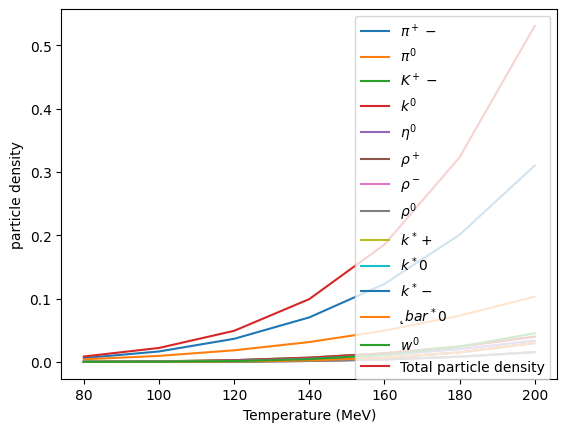

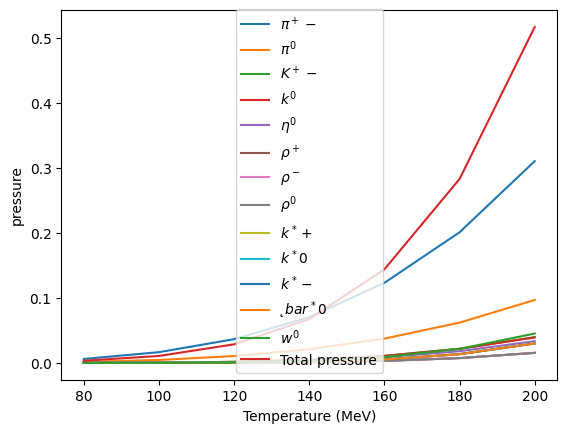

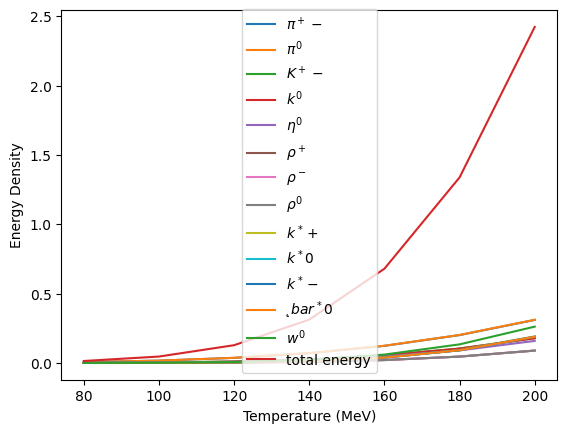

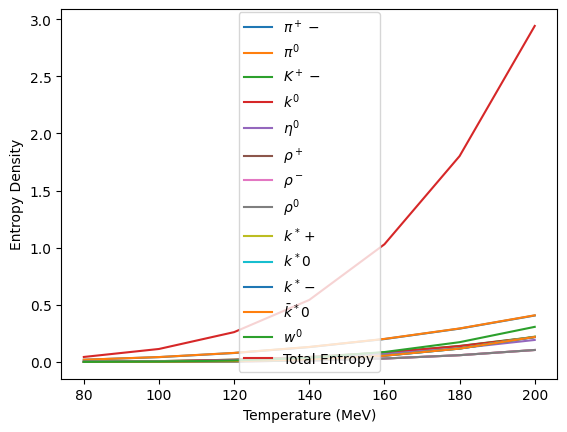

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def particle_density(x, g, mass, mu, tmp):
    y = x ** 2 / (np.exp((np.sqrt(x ** 2 + mass** 2) - mu) / tmp) - 1)
    particle_density = (g / (2.0 * np.pi ** 2)) * y
    return particle_density

def partial_pressure(x, g, mass, mu, tmp):
    y = x ** 2 * np.log(1 - np.exp(-(np.sqrt(x ** 2 + mass ** 2) - mu) / tmp))
    partial_pressure = (-(g * tmp) / (2 * np.pi ** 2)) * y
    return  partial_pressure

def energy_density(x, g, mass, mu, tmp):
    y = (x ** 2 * np.sqrt(x ** 2 + mass ** 2)) / (np.exp((np.sqrt(x ** 2 + mass ** 2) - mu) / tmp) - 1)
    energy_density = (g / (2.0 * np.pi ** 2)) * y
    return energy_density

def entropy_density(x, g, mass, mu, tmp):
    z = (np.sqrt(x ** 2 + mass ** 2) - mu) / (tmp * (np.exp((np.sqrt(x ** 2 + mass  ** 2) - mu) / tmp) - 1))
    y = x ** 2 * (np.log((1 - np.exp(-(np.sqrt(x ** 2 + mass ** 2) - mu) / tmp))) - z)
    entropy_density = (-(g / (2 * np.pi ** 2))) * y
    return entropy_density

# Results storage
results_particle_density = []
results_partial_pressure = []
results_energy_density = []
results_entropy_density = []

# conversion_factor = (1.25e-7)  # Conversion factor from MeV^3 to fm^(-3)


# Temperature values in MeV
tmp_values_mev = [80, 100, 120, 140, 160, 180, 200]

# Particle properties
mass_values_mev = [139.6, 135, 493.7, 497.6, 547.862, 775.26, 775.26, 775.26, 891.76, 896.10, 896.10, 896.10, 782.65]
particle_names = ['pi+', 'pi-', 'pi0', 'K+', 'K0', 'K-', 'Kbar0', 'eta', 'rho+', 'rho-', 'rho0', 'K*+', 'K*0', 'K*-','Kbar*0', 'w0']
g_values = [1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3]
mu_value_mev = 0


# Calculate properties for each particle
for g, mass in zip(g_values, mass_values_mev):
    mass_particle_density_results = []
    mass_partial_pressure_results = []
    mass_energy_density_results = []
    mass_entropy_density_results = []
    for tmp in tmp_values_mev:
        result_particle_density = quad(particle_density, 0, np.inf, args=(g, mass, mu_value_mev, tmp))[0] * (1/(200)**3)

        result_partial_pressure = quad(partial_pressure, 0, np.inf, args=(g, mass, mu_value_mev, tmp))[0] * (1/(200)**4)
        result_energy_density = quad(energy_density, 0, np.inf, args=(g, mass, mu_value_mev, tmp))[0] * (1/(200)**4)
        result_entropy_density = quad(entropy_density, 0, np.inf, args=(g, mass, mu_value_mev, tmp))[0] * (1/(200)**3)
        mass_particle_density_results.append(result_particle_density)
        mass_partial_pressure_results.append(result_partial_pressure)
        mass_energy_density_results.append(result_energy_density)
        mass_entropy_density_results.append(result_entropy_density)

    results_particle_density.append(mass_particle_density_results)
    results_partial_pressure.append(mass_partial_pressure_results)
    results_energy_density.append(mass_energy_density_results)
    results_entropy_density.append(mass_entropy_density_results)



print("Particle density results (fm^(-3)):")
print(results_particle_density[0])
print("\nPartial pressure results (fm^(-4)):")
print(results_partial_pressure[0])
print("\nEnergy density results (fm^(-4)):")
print(results_energy_density[0])
print("\nEntropy density results (fm^(-3)):")
print(results_entropy_density[0])



totalparticledensity=[]
for x, y,z,l,m,n,o,p,u,v,s,t,r in zip(results_particle_density[0], results_particle_density[1],results_particle_density[2],results_particle_density[3],results_particle_density[4], results_particle_density[5], results_particle_density[6],results_particle_density[7],results_particle_density[8],results_particle_density[9],results_particle_density[10], results_particle_density[11],results_particle_density[12]):
    totalparticledensity.append(x + y+l+m+z+n+o+p+u+v+s+t+r)

totalpressure=[]
for x, y,z,l,m,n,o,p,u,v,s,t,r in zip(results_partial_pressure[0], results_partial_pressure[1],results_partial_pressure[2],results_partial_pressure[3],results_partial_pressure[4],results_partial_pressure[5],results_partial_pressure[6],results_partial_pressure[7],results_partial_pressure[8], results_partial_pressure[9],results_partial_pressure[10], results_partial_pressure[11],results_partial_pressure[12]):
    totalpressure.append(x + y+l+m+z+n+o+p+u+v+s+t+r)

totalenergy=[]
for x, y,z,l,m,n,o,p,u,v,s,t,r in zip(results_energy_density[0], results_energy_density[1],results_energy_density[2],results_energy_density[3],results_energy_density[4],results_energy_density[5],results_energy_density[6],results_energy_density[7],results_energy_density[8], results_energy_density[9],results_energy_density[10], results_energy_density[11],results_energy_density[12]):
    totalenergy.append(x + y+l+m+z+n+o+p+u+v+s+t+r)

totalentropy=[]
for x, y,z,l,m,n,o,p,u,v,s,t,r in zip(results_entropy_density[0], results_entropy_density[1],results_entropy_density[2],results_entropy_density[3],results_entropy_density[4],results_entropy_density[5],results_entropy_density[6],results_entropy_density[7],results_entropy_density[8], results_entropy_density[9], results_entropy_density[10], results_entropy_density[11],results_entropy_density[12]):
    totalentropy.append(x + y+l+m+z+n+o+p+u+v+s+t+r)

# Plotting particle density
# plt.figure()
# for i, name in enumerate(particle_names):
plt.figure()
plt.plot(tmp_values_mev, results_energy_density[0], label=r'$\pi^+-$')
plt.plot(tmp_values_mev,results_particle_density[1],label=r'$\pi^0$')
plt.plot(tmp_values_mev,results_particle_density[2],label=r'$K^+-$')
plt.plot(tmp_values_mev,results_particle_density[3],label=r'$k^0$')
plt.plot(tmp_values_mev,results_particle_density[4],label=r'$\eta^0$')
plt.plot(tmp_values_mev,results_particle_density[5],label=r'$\rho^+$')
plt.plot(tmp_values_mev,results_particle_density[6],label=r'$\rho^-$')
plt.plot(tmp_values_mev,results_particle_density[7],label=r'$\rho^0$')
plt.plot(tmp_values_mev,results_particle_density[8],label=r'$k^*+$')
plt.plot(tmp_values_mev,results_particle_density[9],label=r'$k^*0$')
plt.plot(tmp_values_mev,results_particle_density[10],label=r'$k^*-$')
plt.plot(tmp_values_mev,results_particle_density[11],label=r'$\k{bar}^*0$')
plt.plot(tmp_values_mev,results_particle_density[12],label=r'$w^0$')
plt.plot(tmp_values_mev,totalparticledensity,label='Total particle density')
plt.xlabel("Temperature (MeV)")
plt.ylabel("particle density")
plt.legend()
plt.show()

# Plotting partial pressure
# plt.figure()
# for i, name in enumerate(particle_names):
plt.figure()
plt.plot(tmp_values_mev, results_energy_density[0], label=r'$\pi^+-$')
plt.plot(tmp_values_mev,results_partial_pressure[1],label=r'$\pi^0$')
plt.plot(tmp_values_mev,results_partial_pressure[2],label=r'$K^+-$')
plt.plot(tmp_values_mev,results_partial_pressure[3],label=r'$k^0$')
plt.plot(tmp_values_mev,results_partial_pressure[4],label=r'$\eta^0$')
plt.plot(tmp_values_mev,results_partial_pressure[5],label=r'$\rho^+$')
plt.plot(tmp_values_mev,results_partial_pressure[6],label=r'$\rho^-$')
plt.plot(tmp_values_mev,results_partial_pressure[7],label=r'$\rho^0$')
plt.plot(tmp_values_mev,results_partial_pressure[8],label=r'$k^*+$')
plt.plot(tmp_values_mev,results_partial_pressure[9],label=r'$k^*0$')
plt.plot(tmp_values_mev,results_partial_pressure[10],label=r'$k^*-$')
plt.plot(tmp_values_mev,results_partial_pressure[11],label=r'$\k{bar}^*0$')
plt.plot(tmp_values_mev,results_partial_pressure[12],label=r'$w^0$')
plt.plot(tmp_values_mev,totalpressure,label='Total pressure')
plt.xlabel("Temperature (MeV)")
plt.ylabel("pressure")
plt.legend()
plt.show()


# Plotting energy density
# plt.figure()
# for i, name in enumerate(particle_names):
plt.figure()
plt.plot(tmp_values_mev, results_energy_density[0], label=r'$\pi^+-$')
plt.plot(tmp_values_mev,results_energy_density[1],label=r'$\pi^0$')
plt.plot(tmp_values_mev,results_energy_density[2],label=r'$K^+-$')
plt.plot(tmp_values_mev,results_energy_density[3],label=r'$k^0$')
plt.plot(tmp_values_mev,results_energy_density[4],label=r'$\eta^0$')
plt.plot(tmp_values_mev,results_energy_density[5],label=r'$\rho^+$')
plt.plot(tmp_values_mev,results_energy_density[6],label=r'$\rho^-$')
plt.plot(tmp_values_mev,results_energy_density[7],label=r'$\rho^0$')
plt.plot(tmp_values_mev,results_energy_density[8],label=r'$k^*+$')
plt.plot(tmp_values_mev,results_energy_density[9],label=r'$k^*0$')
plt.plot(tmp_values_mev,results_energy_density[10],label=r'$k^*-$')
plt.plot(tmp_values_mev,results_energy_density[11],label=r'$\k{bar}^*0$')
plt.plot(tmp_values_mev,results_energy_density[12],label=r'$w^0$')
plt.plot(tmp_values_mev,totalenergy,label='total energy')
plt.xlabel("Temperature (MeV)")
plt.ylabel("Energy Density")
plt.legend()
plt.show()


# Plotting entropy density
plt.figure()
plt.plot(tmp_values_mev, results_entropy_density[0], label=r'$\pi^+-$')
plt.plot(tmp_values_mev, results_entropy_density[1], label=r'$\pi^0$')
plt.plot(tmp_values_mev, results_entropy_density[2], label=r'$K^+-$')
plt.plot(tmp_values_mev, results_entropy_density[3], label=r'$k^0$')
plt.plot(tmp_values_mev, results_entropy_density[4], label=r'$\eta^0$')
plt.plot(tmp_values_mev, results_entropy_density[5], label=r'$\rho^+$')
plt.plot(tmp_values_mev, results_entropy_density[6], label=r'$\rho^-$')
plt.plot(tmp_values_mev, results_entropy_density[7], label=r'$\rho^0$')
plt.plot(tmp_values_mev, results_entropy_density[8], label=r'$k^*+$')
plt.plot(tmp_values_mev, results_entropy_density[9], label=r'$k^*0$')
plt.plot(tmp_values_mev, results_entropy_density[10], label=r'$k^*-$')
plt.plot(tmp_values_mev, results_entropy_density[11], label=r'$\bar{k}^*0$')
plt.plot(tmp_values_mev, results_entropy_density[12], label=r'$w^0$')
plt.plot(tmp_values_mev, totalentropy, label='Total Entropy')
plt.xlabel("Temperature (MeV)")
plt.ylabel("Entropy Density")
plt.legend()
plt.show()


All Baryon

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import quad

def particle_density(x, g, mass, mu, tmp):
    y = x ** 2 / (np.exp((np.sqrt(x ** 2 + mass** 2) - mu) / tmp) + 1)
    particle_density = (g / (2.0 * np.pi ** 2)) * y
    return particle_density

def partial_pressure(x, g, mass, mu, tmp):
    y = x ** 2 * np.log(1 + np.exp(-(np.sqrt(x ** 2 + mass ** 2) - mu) / tmp))
    partial_pressure = ((g * tmp) / (2 * np.pi ** 2)) * y
    return  partial_pressure

def energy_density(x, g, mass, mu, tmp):
    y = (x ** 2 * np.sqrt(x ** 2 + mass ** 2)) / (np.exp((np.sqrt(x ** 2 + mass ** 2) - mu) / tmp) + 1)
    energy_density = (g / (2.0 * np.pi ** 2)) * y
    return energy_density

def entropy_density(x, g, mass, mu, tmp):
    z = (np.sqrt(x ** 2 + mass ** 2) - mu) / (tmp * (np.exp((np.sqrt(x ** 2 + mass  ** 2) - mu) / tmp) + 1))
    y = x ** 2 * (np.log((1 + np.exp(-(np.sqrt(x ** 2 + mass ** 2) - mu) / tmp))) + z)
    entropy_density = ((g / (2 * np.pi ** 2))) * y
    return entropy_density

# Constants and parameters
tmp_values_mev = [80, 100, 120, 140, 160, 180, 200]  # Temperature values in MeV

# Particle properties
particle_names = ['p', 'n', 'lambda0', 'sigma+', 'sigma0', 'sigma-', 'xi0', 'xi-','Delta++', 'Delta+', 'Delta-', 'Delta0', 'omega-', 'sigma+*', 'sigma0*', 'sigma-*', 'xi0*', 'xi-']
g_values = [2,2,2,2,2,2,2,2,4, 4, 4, 4, 4, 2, 2, 2, 2, 2]
mass_values_mev = [775.26, 775.26, 775.26, 891.76, 896.10, 896.10, 896.10, 782.65,1232, 1232, 1232, 1232, 782, 1382, 1197, 1382, 1315, 1315]
mu_value_mev = 0  # Chemical potential

# Results storage
results_particle_density = []
results_partial_pressure = []
results_energy_density = []
results_entropy_density = []

# conversion_factor = (1.25e-7)  # Conversion factor from MeV^3 to fm^(-3)

# Calculate properties for each particle
for g, mass in zip(g_values, mass_values_mev):
    mass_particle_density_results = []
    mass_partial_pressure_results = []
    mass_energy_density_results = []
    mass_entropy_density_results = []
    for tmp in tmp_values_mev:
        result_particle_density = quad(particle_density, 0, np.inf, args=(g, mass, mu_value_mev, tmp))[0] * (1/(200)**3)

        result_partial_pressure = quad(partial_pressure, 0, np.inf, args=(g, mass, mu_value_mev, tmp))[0] * (1/(200)**4)
        result_energy_density = quad(energy_density, 0, np.inf, args=(g, mass, mu_value_mev, tmp))[0] * (1/(200)**4)
        result_entropy_density = quad(entropy_density, 0, np.inf, args=(g, mass, mu_value_mev, tmp))[0] * (1/(200)**3)
        mass_particle_density_results.append(result_particle_density)
        mass_partial_pressure_results.append(result_partial_pressure)
        mass_energy_density_results.append(result_energy_density)
        mass_entropy_density_results.append(result_entropy_density)

    results_particle_density.append(mass_particle_density_results)
    results_partial_pressure.append(mass_partial_pressure_results)
    results_energy_density.append(mass_energy_density_results)
    results_entropy_density.append(mass_entropy_density_results)



print("Particle density results (fm^(-3)):")
print(results_particle_density[0])
print("\nPartial pressure results (fm^(-4)):")
print(results_partial_pressure[0])
print("\nEnergy density results (fm^(-4)):")
print(results_energy_density[0])
print("\nEntropy density results (fm^(-3)):")
print(results_entropy_density[0])



totalparticledensity=[]
for x,y,z,l,m,n,o,p,u,v,a,b,c,d,e,f,g,h in zip(results_particle_density[0], results_particle_density[1],results_particle_density[2],results_particle_density[3],
                                               results_particle_density[4],results_particle_density[5], results_particle_density[6],results_particle_density[7],
                                               results_particle_density[8],results_particle_density[9],results_particle_density[10], results_particle_density[11],
                                               results_particle_density[12],results_particle_density[13],results_particle_density[14],results_particle_density[15],
                                               results_particle_density[16],results_particle_density[17]):
    totalparticledensity.append(x+y+l+m+z+n+o+p+u+v+a+b+c+d+e+f+g+h)

totalpressure=[]
for x,y,z,l,m,n,o,p,u,v,a,b,c,d,e,f,g,h in zip(results_partial_pressure[0], results_partial_pressure[1],results_partial_pressure[2],results_partial_pressure[3],
                                               results_partial_pressure[4],results_partial_pressure[5],results_partial_pressure[6],results_partial_pressure[7],
                                               results_partial_pressure[8], results_partial_pressure[9],results_partial_pressure[10], results_partial_pressure[11],
                                               results_partial_pressure[12],results_partial_pressure[13],results_partial_pressure[14], results_partial_pressure[15],
                                               results_partial_pressure[16],results_partial_pressure[17]):
    totalpressure.append(x+y+l+m+z+n+o+p+u+v+a+b+c+d+e+f+g+h)

totalenergy=[]
for x,y,z,l,m,n,o,p,u,v,a,b,c,d,e,f,g,h in zip(results_energy_density[0], results_energy_density[1],results_energy_density[2],results_energy_density[3],
                                               results_energy_density[4],results_energy_density[5],results_energy_density[6],results_energy_density[7],
                                               results_energy_density[8], results_energy_density[9],results_energy_density[10], results_energy_density[11],
                                               results_energy_density[12],results_energy_density[13], results_energy_density[14],results_energy_density[15],
                                               results_energy_density[16],results_energy_density[17]):
    totalenergy.append(x+y+l+m+z+n+o+p+u+v+a+b+c+d+e+f+g+h)

totalentropy=[]
for x,y,z,l,m,n,o,p,u,v,a,b,c,d,e,f,g,h in zip(results_entropy_density[0], results_entropy_density[1],results_entropy_density[2],results_entropy_density[3],
                                               results_entropy_density[4],results_entropy_density[5],results_entropy_density[6],results_entropy_density[7],
                                               results_entropy_density[8], results_entropy_density[9],results_entropy_density[10], results_entropy_density[11],
                                               results_entropy_density[12],results_entropy_density[13],results_entropy_density[14],results_entropy_density[15],
                                               results_entropy_density[16],results_entropy_density[17]):
    totalentropy.append(x+y+l+m+z+n+o+p+u+v+a+b+c+d+e+f+g+h)


# Plotting particle density
plt.figure()
# for i, name in enumerate(particle_names):
#     plt.plot(tmp_values_mev, results_particle_density[i], label=name)


plt.plot(tmp_values_mev,results_particle_density[0],label=r'p')
plt.plot(tmp_values_mev,results_particle_density[1],label=r'n')
plt.plot(tmp_values_mev,results_particle_density[2],label=r'$\lambda^0$')
plt.plot(tmp_values_mev,results_particle_density[3],label=r'$\sigma^+$')
plt.plot(tmp_values_mev,results_particle_density[4],label=r'$\sigma^0$')
plt.plot(tmp_values_mev,results_particle_density[5],label=r'$\sigma^-$')
plt.plot(tmp_values_mev,results_particle_density[6],label=r'$\xi^0$')
plt.plot(tmp_values_mev,results_particle_density[7],label=r'$\xi^-$')
plt.plot(tmp_values_mev,results_particle_density[8],label=r'$\Delta^++$')
plt.plot(tmp_values_mev,results_particle_density[9],label=r'$\Delta^+$')
plt.plot(tmp_values_mev,results_particle_density[10],label=r'$\Delta^0$')
plt.plot(tmp_values_mev,results_particle_density[11],label=r'$\Delta^-$')
plt.plot(tmp_values_mev,results_particle_density[12],label=r'$\sigma^+*$')
plt.plot(tmp_values_mev,results_particle_density[13],label=r'$\sigma^0*$')
plt.plot(tmp_values_mev,results_particle_density[14],label=r'$\sigma^-*$')
plt.plot(tmp_values_mev,results_particle_density[15],label=r'$\xi^0*$')
plt.plot(tmp_values_mev,results_particle_density[16],label=r'$\xi^-*$')
plt.plot(tmp_values_mev,results_particle_density[17],label=r'$\omega^-$')
plt.plot(tmp_values_mev,totalparticledensity,label=' total particle density')
plt.xlabel("Temperature (MeV)")
plt.ylabel("Particle Density")
plt.legend()
plt.show()

# Plotting partial pressure
plt.figure()
# for i, name in enumerate(particle_names):
#     plt.plot(tmp_values_mev, results_partial_pressure[i], label=name)


plt.plot(tmp_values_mev,results_partial_pressure[0],label=r'p')
plt.plot(tmp_values_mev,results_partial_pressure[1],label=r'n')
plt.plot(tmp_values_mev,results_partial_pressure[2],label=r'$\lambda^0$')
plt.plot(tmp_values_mev,results_partial_pressure[3],label=r'$\sigma^+$')
plt.plot(tmp_values_mev,results_partial_pressure[4],label=r'$\sigma^0$')
plt.plot(tmp_values_mev,results_partial_pressure[5],label=r'$\sigma^-$')
plt.plot(tmp_values_mev,results_partial_pressure[6],label=r'$\xi^0$')
plt.plot(tmp_values_mev,results_partial_pressure[7],label=r'$\xi^-$')
plt.plot(tmp_values_mev,results_partial_pressure[8],label=r'$\Delta^++$')
plt.plot(tmp_values_mev,results_partial_pressure[9],label=r'$\Delta^+$')
plt.plot(tmp_values_mev,results_partial_pressure[10],label=r'$\Delta^0$')
plt.plot(tmp_values_mev,results_partial_pressure[11],label=r'$\Delta^-$')
plt.plot(tmp_values_mev,results_partial_pressure[12],label=r'$\sigma^+*$')
plt.plot(tmp_values_mev,results_partial_pressure[13],label=r'$\sigma^0*$')
plt.plot(tmp_values_mev,results_partial_pressure[14],label=r'$\sigma^-*$')
plt.plot(tmp_values_mev,results_partial_pressure[15],label=r'$\xi^0*$')
plt.plot(tmp_values_mev,results_partial_pressure[16],label=r'$\xi^-*$')
plt.plot(tmp_values_mev,results_partial_pressure[17],label=r'$\omega^-$')
plt.plot(tmp_values_mev,totalpressure,label=' total pressure')
plt.xlabel("Temperature (MeV)")
plt.ylabel("Partial Pressure")
plt.legend()
plt.show()

# Plotting energy density
plt.figure()
# for i, name in enumerate(particle_names):
#     plt.plot(tmp_values_mev, results_energy_density[i], label=name)

plt.plot(tmp_values_mev,results_energy_density[0],label=r'p')
plt.plot(tmp_values_mev,results_energy_density[1],label=r'n')
plt.plot(tmp_values_mev,results_energy_density[2],label=r'$\lambda^0$')
plt.plot(tmp_values_mev,results_energy_density[3],label=r'$\sigma^+$')
plt.plot(tmp_values_mev,results_energy_density[4],label=r'$\sigma^0$')
plt.plot(tmp_values_mev,results_energy_density[5],label=r'$\sigma^-$')
plt.plot(tmp_values_mev,results_energy_density[6],label=r'$\xi^0$')
plt.plot(tmp_values_mev,results_energy_density[7],label=r'$\xi^-$')
plt.plot(tmp_values_mev,results_energy_density[8],label=r'$\Delta^++$')
plt.plot(tmp_values_mev,results_energy_density[9],label=r'$\Delta^+$')
plt.plot(tmp_values_mev,results_energy_density[10],label=r'$\Delta^0$')
plt.plot(tmp_values_mev,results_energy_density[11],label=r'$\Delta^-$')
plt.plot(tmp_values_mev,results_energy_density[12],label=r'$\sigma^+*$')
plt.plot(tmp_values_mev,results_energy_density[13],label=r'$\sigma^0*$')
plt.plot(tmp_values_mev,results_energy_density[14],label=r'$\sigma^-*$')
plt.plot(tmp_values_mev,results_energy_density[15],label=r'$\xi^0*$')
plt.plot(tmp_values_mev,results_energy_density[16],label=r'$\xi^-*$')
plt.plot(tmp_values_mev,results_energy_density[17],label=r'$\omega^-$')
plt.plot(tmp_values_mev,totalenergy,label=' total energy')
plt.xlabel("Temperature (MeV)")
plt.ylabel("Energy")
plt.legend()
plt.show()

# Plotting entropy density
plt.figure()
# for i, name in enumerate(particle_names):
#     plt.plot(tmp_values_mev, results_entropy_density[i], label=name)


plt.plot(tmp_values_mev,results_entropy_density[0],label=r'p')
plt.plot(tmp_values_mev,results_entropy_density[1],label=r'n')
plt.plot(tmp_values_mev,results_entropy_density[2],label=r'$\lambda^0$')
plt.plot(tmp_values_mev,results_entropy_density[3],label=r'$\sigma^+$')
plt.plot(tmp_values_mev,results_entropy_density[4],label=r'$\sigma^0$')
plt.plot(tmp_values_mev,results_entropy_density[5],label=r'$\sigma^-$')
plt.plot(tmp_values_mev,results_entropy_density[6],label=r'$\xi^0$')
plt.plot(tmp_values_mev,results_entropy_density[7],label=r'$\xi^-$')
plt.plot(tmp_values_mev,results_entropy_density[8],label=r'$\Delta^++$')
plt.plot(tmp_values_mev,results_entropy_density[9],label=r'$\Delta^+$')
plt.plot(tmp_values_mev,results_entropy_density[10],label=r'$\Delta^0$')
plt.plot(tmp_values_mev,results_entropy_density[11],label=r'$\Delta^-$')
plt.plot(tmp_values_mev,results_entropy_density[12],label=r'$\sigma^+*$')
plt.plot(tmp_values_mev,results_entropy_density[13],label=r'$\sigma^0*$')
plt.plot(tmp_values_mev,results_entropy_density[14],label=r'$\sigma^-*$')
plt.plot(tmp_values_mev,results_entropy_density[15],label=r'$\xi^0*$')
plt.plot(tmp_values_mev,results_entropy_density[16],label=r'$\xi^-*$')
plt.plot(tmp_values_mev,results_entropy_density[17],label=r'$\omega^-$')
plt.plot(tmp_values_mev,totalentropy,label=' total entropy')
plt.xlabel("Temperature (MeV)")
plt.ylabel("Entropy")
plt.legend()
plt.show()


For Hadrons

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def particle_density1(x, g, mass, mu, tmp):
    y = x ** 2 / (np.exp((np.sqrt(x ** 2 + mass** 2) - mu) / tmp) - 1)
    particle_density1 = (g / (2.0 * np.pi ** 2)) * y
    return particle_density1

def partial_pressure1(x, g, mass, mu, tmp):
    y = x ** 2 * np.log(1 - np.exp(-(np.sqrt(x ** 2 + mass ** 2) - mu) / tmp))
    partial_pressure1 = (-(g * tmp) / (2 * np.pi ** 2)) * y
    return  partial_pressure1

def energy_density1(x, g, mass, mu, tmp):
    y = (x ** 2 * np.sqrt(x ** 2 + mass ** 2)) / (np.exp((np.sqrt(x ** 2 + mass ** 2) - mu) / tmp) - 1)
    energy_density1 = (g / (2.0 * np.pi ** 2)) * y
    return energy_density1

def entropy_density1(x, g, mass, mu, tmp):
    z = (np.sqrt(x ** 2 + mass ** 2) - mu) / (tmp * (np.exp((np.sqrt(x ** 2 + mass  ** 2) - mu) / tmp) - 1))
    y = x ** 2 * (np.log((1 - np.exp(-(np.sqrt(x ** 2 + mass ** 2) - mu) / tmp))) - z)
    entropy_density1 = (-(g / (2 * np.pi ** 2))) * y
    return entropy_density1


def particle_density(x, g, mass, mu, tmp):
    y = x ** 2 / (np.exp((np.sqrt(x ** 2 + mass** 2) - mu) / tmp) + 1)
    particle_density = (g / (2.0 * np.pi ** 2)) * y
    return particle_density

def partial_pressure(x, g, mass, mu, tmp):
    y = x ** 2 * np.log(1 + np.exp(-(np.sqrt(x ** 2 + mass ** 2) - mu) / tmp))
    partial_pressure = ((g * tmp) / (2 * np.pi ** 2)) * y
    return  partial_pressure

def energy_density(x, g, mass, mu, tmp):
    y = (x ** 2 * np.sqrt(x ** 2 + mass ** 2)) / (np.exp((np.sqrt(x ** 2 + mass ** 2) - mu) / tmp) + 1)
    energy_density = (g / (2.0 * np.pi ** 2)) * y
    return energy_density

def entropy_density(x, g, mass, mu, tmp):
    z = (np.sqrt(x ** 2 + mass ** 2) - mu) / (tmp * (np.exp((np.sqrt(x ** 2 + mass  ** 2) - mu) / tmp) + 1))
    y = x ** 2 * (np.log((1 + np.exp(-(np.sqrt(x ** 2 + mass ** 2) - mu) / tmp))) + z)
    entropy_density = ((g / (2 * np.pi ** 2))) * y
    return entropy_density

# Constants and parameters
tmp_values_mev = [80, 100, 120, 140, 160, 180, 200]  # Temperature values in MeV

# Particle properties
particle_names = ['p', 'n', 'lambda0', 'sigma+', 'sigma0', 'sigma-', 'xi0', 'xi-','Delta++', 'Delta+', 'Delta-', 'Delta0', 'omega-', 'sigma+*', 'sigma0*', 'sigma-*', 'xi0*', 'xi-']
g_values = [2,2,2,2,2,2,2,2,4, 4, 4, 4, 4, 2, 2, 2, 2, 2]
mass_values_mev = [775.26, 775.26, 775.26, 891.76, 896.10, 896.10, 896.10, 782.65,1232, 1232, 1232, 1232, 782, 1382, 1197, 1382, 1315, 1315]
mu_value_mev = 0  # Chemical potential




# Constants and parameters
tmp_values_mev1 = [80, 100, 120, 140, 160, 180, 200]  # Temperature values in MeV
# Particle properties
mass_values_mev1 = [139.6, 135, 493.7, 497.6, 547.862, 775.26, 775.26, 775.26, 891.76, 896.10, 896.10, 896.10, 782.65]
particle_names1 = ['pi+', 'pi-', 'pi0', 'K+', 'K0', 'K-', 'Kbar0', 'eta', 'rho+', 'rho-', 'rho0', 'K*+', 'K*0', 'K*-','Kbar*0', 'w0']
g_values1 = [1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3]
mu_value_mev1 = 0

# Results storage
results_particle_density = []
results_partial_pressure = []
results_energy_density = []
results_entropy_density = []

# conversion_factor = (1.25e-7)  # Conversion factor from MeV^3 to fm^(-3)

# Calculate properties for each particle
for g, mass in zip(g_values, mass_values_mev):
    mass_particle_density_results = []
    mass_partial_pressure_results = []
    mass_energy_density_results = []
    mass_entropy_density_results = []
    for tmp in tmp_values_mev:
        result_particle_density = quad(particle_density, 0, np.inf, args=(g, mass, mu_value_mev, tmp))[0] * (1/(200)**3)

        result_partial_pressure = quad(partial_pressure, 0, np.inf, args=(g, mass, mu_value_mev, tmp))[0] * (1/(200)**4)
        result_energy_density = quad(energy_density, 0, np.inf, args=(g, mass, mu_value_mev, tmp))[0] * (1/(200)**4)
        result_entropy_density = quad(entropy_density, 0, np.inf, args=(g, mass, mu_value_mev, tmp))[0] * (1/(200)**3)
        mass_particle_density_results.append(result_particle_density)
        mass_partial_pressure_results.append(result_partial_pressure)
        mass_energy_density_results.append(result_energy_density)
        mass_entropy_density_results.append(result_entropy_density)

    results_particle_density.append(mass_particle_density_results)
    results_partial_pressure.append(mass_partial_pressure_results)
    results_energy_density.append(mass_energy_density_results)
    results_entropy_density.append(mass_entropy_density_results)



print("Particle density results (fm^(-3)):")
print(results_particle_density[0])
print("\nPartial pressure results (fm^(-4)):")
print(results_partial_pressure[0])
print("\nEnergy density results (fm^(-4)):")
print(results_energy_density[0])
print("\nEntropy density results (fm^(-3)):")
print(results_entropy_density[0])


# Results storage
results_particle_density1 = []
results_partial_pressure1 = []
results_energy_density1 = []
results_entropy_density1 = []

# conversion_factor = (1.25e-7)  # Conversion factor from MeV^3 to fm^(-3)

# Calculate properties for each particle
for g, mass in zip(g_values, mass_values_mev1):
    mass_particle_density1_results = []
    mass_partial_pressure1_results = []
    mass_energy_density1_results = []
    mass_entropy_density1_results = []
    for tmp in tmp_values_mev1:
        result_particle_density1 = quad(particle_density1, 0, np.inf, args=(g, mass, mu_value_mev1, tmp))[0] * (1/(200)**3)

        result_partial_pressure1 = quad(partial_pressure1, 0, np.inf, args=(g, mass, mu_value_mev1, tmp))[0] * (1/(200)**4)
        result_energy_density1 = quad(energy_density1, 0, np.inf, args=(g, mass, mu_value_mev1, tmp))[0] * (1/(200)**4)
        result_entropy_density1 = quad(entropy_density1, 0, np.inf, args=(g, mass, mu_value_mev1, tmp))[0] * (1/(200)**3)
        mass_particle_density1_results.append(result_particle_density1)
        mass_partial_pressure1_results.append(result_partial_pressure1)
        mass_energy_density1_results.append(result_energy_density1)
        mass_entropy_density1_results.append(result_entropy_density1)

    results_particle_density1.append(mass_particle_density1_results)
    results_partial_pressure1.append(mass_partial_pressure1_results)
    results_energy_density1.append(mass_energy_density1_results)
    results_entropy_density1.append(mass_entropy_density1_results)



print("Particle density results1 (fm^(-3)):")
print(results_particle_density1[0])
print("\nPartial pressure results1 (fm^(-4)):")
print(results_partial_pressure1[0])
print("\nEnergy density results1 (fm^(-4)):")
print(results_energy_density1[0])
print("\nEntropy density results1 (fm^(-3)):")
print(results_entropy_density1[0])



totalparticledensity = [sum(particles) for particles in zip(*results_particle_density)]
totalpartialpressure = [sum(pressure) for pressure in zip(*results_partial_pressure)]
totalenergydensity = [sum(energy) for energy in zip(*results_energy_density)]
totalentropy = [sum(entropy) for entropy in zip(*results_entropy_density)]

totalparticledensity1 = [sum(particles) for particles in zip(*results_particle_density1)]
totalpartialpressure1 = [sum(pressure) for pressure in zip(*results_partial_pressure1)]
totalenergydensity1 = [sum(energy) for energy in zip(*results_energy_density1)]
totalentropy1= [sum(entropy) for entropy in zip(*results_entropy_density1)]

hadron_density= totalparticledensity+totalparticledensity1
Pressure= totalpartialpressure+totalpartialpressure1
energy= totalenergydensity+totalenergydensity1
entropy= totalentropy+totalentropy1


print("hadron density results (fm^(-3)):")
print(results_hadron_density[0])
print("\npressure results (fm^(-4)):")
print(results_pressure[0])
print("\nEnergy results (fm^(-4)):")
print(results_energy[0])
print("\nEntropy results1 (fm^(-3)):")
print(results_entropy[0])


# Plotting particle density
plt.figure()
# for i, name in enumerate(particle_names):
#     plt.plot(tmp_values_mev, results_particle_density[i], label=name)


# plt.plot(tmp_values_mev,results_particle_density[0],label=r'p')
# plt.plot(tmp_values_mev,results_particle_density[1],label=r'n')
# plt.plot(tmp_values_mev,results_particle_density[2],label=r'$\lambda^0$')
# plt.plot(tmp_values_mev,results_particle_density[3],label=r'$\sigma^+$')
# plt.plot(tmp_values_mev,results_particle_density[4],label=r'$\sigma^0$')
# plt.plot(tmp_values_mev,results_particle_density[5],label=r'$\sigma^-$')
# plt.plot(tmp_values_mev,results_particle_density[6],label=r'$\xi^0$')
# plt.plot(tmp_values_mev,results_particle_density[7],label=r'$\xi^-$')
# plt.plot(tmp_values_mev,results_particle_density[8],label=r'$\Delta^++$')
# plt.plot(tmp_values_mev,results_particle_density[9],label=r'$\Delta^+$')
# plt.plot(tmp_values_mev,results_particle_density[10],label=r'$\Delta^0$')
# plt.plot(tmp_values_mev,results_particle_density[11],label=r'$\Delta^-$')
# plt.plot(tmp_values_mev,results_particle_density[12],label=r'$\sigma^+*$')
# plt.plot(tmp_values_mev,results_particle_density[13],label=r'$\sigma^0*$')
# plt.plot(tmp_values_mev,results_particle_density[14],label=r'$\sigma^-*$')
# plt.plot(tmp_values_mev,results_particle_density[15],label=r'$\xi^0*$')
# plt.plot(tmp_values_mev,results_particle_density[16],label=r'$\xi^-*$')
# plt.plot(tmp_values_mev,results_particle_density[17],label=r'$\omega^-$')
plt.plot(tmp_values_mev, total_hadron_density, label='Total Hadron Density')
plt.xlabel("Temperature (MeV)")
plt.ylabel("Hadron Density")
plt.legend()
plt.show()

# Plotting partial pressure
plt.figure()
# for i, name in enumerate(particle_names):
#     plt.plot(tmp_values_mev, results_partial_pressure[i], label=name)


# plt.plot(tmp_values_mev,results_partial_pressure[0],label=r'p')
# plt.plot(tmp_values_mev,results_partial_pressure[1],label=r'n')
# plt.plot(tmp_values_mev,results_partial_pressure[2],label=r'$\lambda^0$')
# plt.plot(tmp_values_mev,results_partial_pressure[3],label=r'$\sigma^+$')
# plt.plot(tmp_values_mev,results_partial_pressure[4],label=r'$\sigma^0$')
# plt.plot(tmp_values_mev,results_partial_pressure[5],label=r'$\sigma^-$')
# plt.plot(tmp_values_mev,results_partial_pressure[6],label=r'$\xi^0$')
# plt.plot(tmp_values_mev,results_partial_pressure[7],label=r'$\xi^-$')
# plt.plot(tmp_values_mev,results_partial_pressure[8],label=r'$\Delta^++$')
# plt.plot(tmp_values_mev,results_partial_pressure[9],label=r'$\Delta^+$')
# plt.plot(tmp_values_mev,results_partial_pressure[10],label=r'$\Delta^0$')
# plt.plot(tmp_values_mev,results_partial_pressure[11],label=r'$\Delta^-$')
# plt.plot(tmp_values_mev,results_partial_pressure[12],label=r'$\sigma^+*$')
# plt.plot(tmp_values_mev,results_partial_pressure[13],label=r'$\sigma^0*$')
# plt.plot(tmp_values_mev,results_partial_pressure[14],label=r'$\sigma^-*$')
# plt.plot(tmp_values_mev,results_partial_pressure[15],label=r'$\xi^0*$')
# plt.plot(tmp_values_mev,results_partial_pressure[16],label=r'$\xi^-*$')
# plt.plot(tmp_values_mev,results_partial_pressure[17],label=r'$\omega^-$')
plt.plot(tmp_values_mev,totalpressure,label=' total pressure')
plt.xlabel("Temperature (MeV)")
plt.ylabel("Pressure")
plt.legend()
plt.show()

# Plotting energy density
plt.figure()
# for i, name in enumerate(particle_names):
#     plt.plot(tmp_values_mev, results_energy_density[i], label=name)

# plt.plot(tmp_values_mev,results_energy_density[0],label=r'p')
# plt.plot(tmp_values_mev,results_energy_density[1],label=r'n')
# plt.plot(tmp_values_mev,results_energy_density[2],label=r'$\lambda^0$')
# plt.plot(tmp_values_mev,results_energy_density[3],label=r'$\sigma^+$')
# plt.plot(tmp_values_mev,results_energy_density[4],label=r'$\sigma^0$')
# plt.plot(tmp_values_mev,results_energy_density[5],label=r'$\sigma^-$')
# plt.plot(tmp_values_mev,results_energy_density[6],label=r'$\xi^0$')
# plt.plot(tmp_values_mev,results_energy_density[7],label=r'$\xi^-$')
# plt.plot(tmp_values_mev,results_energy_density[8],label=r'$\Delta^++$')
# plt.plot(tmp_values_mev,results_energy_density[9],label=r'$\Delta^+$')
# plt.plot(tmp_values_mev,results_energy_density[10],label=r'$\Delta^0$')
# plt.plot(tmp_values_mev,results_energy_density[11],label=r'$\Delta^-$')
# plt.plot(tmp_values_mev,results_energy_density[12],label=r'$\sigma^+*$')
# plt.plot(tmp_values_mev,results_energy_density[13],label=r'$\sigma^0*$')
# plt.plot(tmp_values_mev,results_energy_density[14],label=r'$\sigma^-*$')
# plt.plot(tmp_values_mev,results_energy_density[15],label=r'$\xi^0*$')
# plt.plot(tmp_values_mev,results_energy_density[16],label=r'$\xi^-*$')
# plt.plot(tmp_values_mev,results_energy_density[17],label=r'$\omega^-$')
plt.plot(tmp_values_mev,totalenergy,label=' total energy')
plt.xlabel("Temperature (MeV)")
plt.ylabel("Energy")
plt.legend()
plt.show()

# Plotting entropy density
plt.figure()
# for i, name in enumerate(particle_names):
#     plt.plot(tmp_values_mev, results_entropy_density[i], label=name)


# plt.plot(tmp_values_mev,results_entropy_density[0],label=r'p')
# plt.plot(tmp_values_mev,results_entropy_density[1],label=r'n')
# plt.plot(tmp_values_mev,results_entropy_density[2],label=r'$\lambda^0$')
# plt.plot(tmp_values_mev,results_entropy_density[3],label=r'$\sigma^+$')
# plt.plot(tmp_values_mev,results_entropy_density[4],label=r'$\sigma^0$')
# plt.plot(tmp_values_mev,results_entropy_density[5],label=r'$\sigma^-$')
# plt.plot(tmp_values_mev,results_entropy_density[6],label=r'$\xi^0$')
# plt.plot(tmp_values_mev,results_entropy_density[7],label=r'$\xi^-$')
# plt.plot(tmp_values_mev,results_entropy_density[8],label=r'$\Delta^++$')
# plt.plot(tmp_values_mev,results_entropy_density[9],label=r'$\Delta^+$')
# plt.plot(tmp_values_mev,results_entropy_density[10],label=r'$\Delta^0$')
# plt.plot(tmp_values_mev,results_entropy_density[11],label=r'$\Delta^-$')
# plt.plot(tmp_values_mev,results_entropy_density[12],label=r'$\sigma^+*$')
# plt.plot(tmp_values_mev,results_entropy_density[13],label=r'$\sigma^0*$')
# plt.plot(tmp_values_mev,results_entropy_density[14],label=r'$\sigma^-*$')
# plt.plot(tmp_values_mev,results_entropy_density[15],label=r'$\xi^0*$')
# plt.plot(tmp_values_mev,results_entropy_density[16],label=r'$\xi^-*$')
# plt.plot(tmp_values_mev,results_entropy_density[17],label=r'$\omega^-$')
plt.plot(tmp_values_mev,totalentropy,label=' total entropy')
plt.xlabel("Temperature (MeV)")
plt.ylabel("Entropy")
plt.legend()
plt.show()


<ipython-input-17-82c17c2e5d47>:6: RuntimeWarning: overflow encountered in exp
  y = x ** 2 / (np.exp((np.sqrt(x ** 2 + mass** 2) - mu) / tmp) + 1)
<ipython-input-17-82c17c2e5d47>:16: RuntimeWarning: overflow encountered in exp
  y = (x ** 2 * np.sqrt(x ** 2 + mass ** 2)) / (np.exp((np.sqrt(x ** 2 + mass ** 2) - mu) / tmp) + 1)
<ipython-input-17-82c17c2e5d47>:21: RuntimeWarning: overflow encountered in exp
  z = (np.sqrt(x ** 2 + mass ** 2) - mu) / (tmp * (np.exp((np.sqrt(x ** 2 + mass  ** 2) - mu) / tmp) + 1))
<ipython-input-17-82c17c2e5d47>:50: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  result_partial_pressure = quad(partial_pressure, 0, np.inf, args=(g, mass, mu_value_mev, tmp))[0] * (1/(200)**4)


Particle density results (fm^(-3)):
[1.822639634319511e-05, 0.0001847078778865825, 0.0009216042624826489, 0.0030431768994655904, 0.007724335781395957, 0.016395817191019006, 0.030632507341795054]

Partial pressure results (fm^(-4)):
[7.290631418932361e-06, 9.236022170049008e-05, 0.0005530967898521929, 0.0021314997764436106, 0.006186720325351449, 0.014785325893617175, 0.030723600117565534]

Energy density results (fm^(-4)):
[8.286112515510615e-05, 0.0008742082620376758, 0.004540117814899149, 0.015599575618718142, 0.0411857551242369, 0.09089310904677753, 0.17647471431472528]

Entropy density results (fm^(-3)):
[0.00022537939143509628, 0.0019331369674763315, 0.008488691007918901, 0.025330107707373924, 0.059215594311985434, 0.11742048326710522, 0.2071983144322908]
80 0.007863350665425043
100 0.019969303873216767
120 0.04422718770772402
140 0.089580540970671
160 0.16826333354739534
180 0.29509930305053705
200 0.4866140468365934


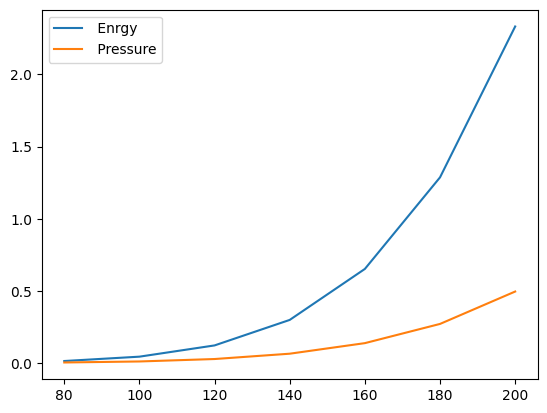

In [ ]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

def particle_density(x, g, mass, mu, tmp):
    y = x ** 2 / (np.exp((np.sqrt(x ** 2 + mass** 2) - mu) / tmp) + 1)
    particle_density = (g / (2.0 * np.pi ** 2)) * y
    return particle_density

def partial_pressure(x, g, mass, mu, tmp):
    y = x ** 2 * np.log(1 + np.exp(-(np.sqrt(x ** 2 + mass ** 2) - mu) / tmp))
    partial_pressure = ((g * tmp) / (2 * np.pi ** 2)) * y
    return  partial_pressure

def energy_density(x, g, mass, mu, tmp):
    y = (x ** 2 * np.sqrt(x ** 2 + mass ** 2)) / (np.exp((np.sqrt(x ** 2 + mass ** 2) - mu) / tmp) + 1)
    energy_density = (g / (2.0 * np.pi ** 2)) * y
    return energy_density

def entropy_density(x, g, mass, mu, tmp):
    z = (np.sqrt(x ** 2 + mass ** 2) - mu) / (tmp * (np.exp((np.sqrt(x ** 2 + mass  ** 2) - mu) / tmp) + 1))
    y = x ** 2 * (np.log((1 + np.exp(-(np.sqrt(x ** 2 + mass ** 2) - mu) / tmp))) + z)
    entropy_density = ((g / (2 * np.pi ** 2))) * y
    return entropy_density

# Constants and parameters
tmp_values_mev = [80, 100, 120, 140, 160, 180, 200]  # Temperature values in MeV

# Particle properties
particle_names = ['p', 'n', 'lambda0', 'sigma+', 'sigma0', 'sigma-', 'xi0', 'xi-','Delta++', 'Delta+', 'Delta-', 'Delta0', 'omega-', 'sigma+*', 'sigma0*', 'sigma-*', 'xi0*', 'xi-']
g_values = [2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2]
mass_values_mev = [775.26, 775.26, 775.26, 891.76, 896.10, 896.10, 896.10, 782.65, 1232, 1232, 1232, 1232, 782, 1382, 1197, 1382, 1315, 1315]
mu_value_mev = 0  # Chemical potential

# Results storage
results_particle_density = []
results_partial_pressure = []
results_energy_density = []
results_entropy_density = []

# Calculate properties for each particle
for g, mass in zip(g_values, mass_values_mev):
    mass_particle_density_results = []
    mass_partial_pressure_results = []
    mass_energy_density_results = []
    mass_entropy_density_results = []
    for tmp in tmp_values_mev:
        result_particle_density = quad(particle_density, 0, np.inf, args=(g, mass, mu_value_mev,tmp))[0] * (1/(200)**3)

        result_partial_pressure = quad(partial_pressure, 0, np.inf, args=(g, mass, mu_value_mev, tmp))[0] * (1/(200)**4)
        result_energy_density = quad(energy_density, 0, np.inf, args=(g, mass, mu_value_mev, tmp))[0] * (1/(200)**4)
        result_entropy_density = quad(entropy_density, 0, np.inf, args=(g, mass, mu_value_mev, tmp))[0] * (1/(200)**3)
        mass_particle_density_results.append(result_particle_density)
        mass_partial_pressure_results.append(result_partial_pressure)
        mass_energy_density_results.append(result_energy_density)
        mass_entropy_density_results.append(result_entropy_density)

    results_particle_density.append(mass_particle_density_results)
    results_partial_pressure.append(mass_partial_pressure_results)
    results_energy_density.append(mass_energy_density_results)
    results_entropy_density.append(mass_entropy_density_results)

print("Particle density results (fm^(-3)):")
print(results_particle_density[0])
print("\nPartial pressure results (fm^(-4)):")
print(results_partial_pressure[0])
print("\nEnergy density results (fm^(-4)):")
print(results_energy_density[0])
print("\nEntropy density results (fm^(-3)):")
print(results_entropy_density[0])


# Constants and parameters
tmp_values_mev1 = [80, 100, 120, 140, 160, 180, 200]  # Temperature values in MeV
# Particle properties
mass_values_mev1 = [139.6, 135, 493.7, 497.6, 547.862, 775.26, 775.26, 775.26, 891.76, 896.10, 896.10, 896.10, 782.65]
particle_names1 = ['pi+', 'pi-', 'pi0', 'K+', 'K0', 'K-', 'Kbar0', 'eta', 'rho+', 'rho-', 'rho0', 'K*+', 'K*0', 'K*-','Kbar*0', 'w0']
g_values1 = [1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3]
mu_value_mev1 = 0

# Results storage
mlen=len(mass_values_mev1)
tlen = len(tmp_values_mev1)
results_particle_density1 = np.empty([mlen, tlen])
results_partial_pressure1 = np.empty([mlen, tlen])
results_energy_density1 = np.empty([mlen, tlen])
results_entropy_density1 = np.empty([mlen, tlen])

# Calculate properties for each particle
i=0
for g, mass in zip(g_values1, mass_values_mev1):
    mass_particle_density1_results = []
    mass_partial_pressure1_results = []
    mass_energy_density1_results = []
    mass_entropy_density1_results = []
    j=0
    for tmp in tmp_values_mev1:
      rpd1 = quad(particle_density, 0, np.inf, args=(g, mass, mu_value_mev1, tmp))[0] * (1/(200)**3)
      rpp1 = quad(partial_pressure, 0, np.inf, args=(g, mass, mu_value_mev1, tmp))[0] * (1/(200)**4)
      rpe1 = quad(energy_density, 0, np.inf, args=(g, mass, mu_value_mev1, tmp))[0] * (1/(200)**4)
      rentr1 = quad(entropy_density, 0, np.inf, args=(g, mass, mu_value_mev1, tmp))[0] * (1/(200)**3)
      results_particle_density1[i][j]=rpd1
      results_partial_pressure1[i][j]=rpp1
      results_energy_density1[i][j] = rpe1
      results_entropy_density1[i][j] = rentr1
      j=j+1
    i=i+1


Pmes=[]
Emes=[]
Smes=[]
Nmes=[]
for j in range(tlen):
  #print(tmp_values_mev1[j])
  press=0
  energd=0
  numbd=0
  entrd=0
  for i in range(mlen):
    numbd=numbd + results_particle_density1[i][j]
    press = press+results_partial_pressure1[i][j]
    energd = energd + results_energy_density1[i][j]
    entrd = entrd + results_entropy_density1[i][j]
  print(tmp_values_mev1[j], numbd)
  Pmes.append(press)
  Emes.append(energd)
  Smes.append(entrd)
  Nmes.append(numbd)


plt.plot(tmp_values_mev1,Emes,label=' Enrgy')
plt.plot(tmp_values_mev1,Pmes,label=' Pressure')
plt.legend()
plt.show()



# print("Particle density results (fm^(-3)):")
# print(results_particle_density1[0])
# print("\nPartial pressure results (fm^(-4)):")
# print(results_partial_pressure1[0])
# print("\nEnergy density results (fm^(-4)):")
# print(results_energy_density1[0])
# print("\nEntropy density results (fm^(-3)):")
# print(results_entropy_density1[0])
# import numpy as np
# import matplotlib.pyplot as plt

# import numpy as np
# import matplotlib.pyplot as plt

# print(type(results_particle_density))
# print('Size',len(results_particle_density),len(results_particle_density1))

# # Combine the results for particle density, energy density, partial pressure, and entropy density
# combined_particle_density = results_particle_density + results_particle_density1
# combined_energy_density = results_energy_density + results_energy_density1
# combined_partial_pressure = results_partial_pressure + results_partial_pressure1
# combined_entropy_density = results_entropy_density + results_entropy_density1

# # Temperature values
# # tmp_values_mev_combined = tmp_values_mev + tmp_values_mev1

# # Plot particle density vs T(Mev)
# plt.figure(figsize=(10, 6))
# for i in range(len(particle_names)):
#     plt.plot(tmp_values_mev, combined_particle_density[i], label=particle_names[i])
# plt.xlabel("Temperature (MeV)")
# plt.ylabel("Particle Density (fm$^{-3}$)")
# plt.title("Particle Density vs Temperature")
# plt.legend()
# plt.grid(True)
# plt.show()

# # Plot energy density vs T(Mev)
# plt.figure(figsize=(10, 6))
# for i in range(len(particle_names1)):
#     plt.plot(tmp_values_mev1, combined_energy_density[i], label=particle_names1[i])
# plt.xlabel("Temperature (MeV)")
# plt.ylabel("Energy Density (fm$^{-4}$)")
# plt.title("Energy Density vs Temperature")
# plt.legend()
# plt.grid(True)
# plt.show()

# # Plot partial pressure vs T(Mev)
# plt.figure(figsize=(10, 6))
# for i in range(len(particle_names)):
#     plt.plot(tmp_values_mev, combined_partial_pressure[i], label=particle_names[i])
# plt.xlabel("Temperature (MeV)")
# plt.ylabel("Partial Pressure (fm$^{-4}$)")
# plt.title("Partial Pressure vs Temperature")
# plt.legend()
# plt.grid(True)
# plt.show()

# # Plot entropy density vs T(Mev)
# plt.figure(figsize=(10, 6))
# for i in range(len(particle_names1)):
#     plt.plot(tmp_values_mev1, combined_entropy_density[i], label=particle_names1[i])
# plt.xlabel("Temperature (MeV)")
# plt.ylabel("Entropy Density (fm$^{-3}$)")
# plt.title("Entropy Density vs Temperature")
# plt.legend()
# plt.grid(True)
# plt.show()

